# Tumor size prediction

#### https://www.machinehack.com/hackathons/melanoma_tumor_size_prediction_weekend_hackathon_15/data

### Importing necessary Libraries

In [1]:
import pandas as pd
from pandas_profiling import profile_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,r2_score, mean_absolute_error, mean_squared_error,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, SelectFromModel
from scipy import stats
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from statsmodels.stats.outliers_influence import variance_inflation_factor


def conductTest(a,b):
    freq_table = pd.crosstab(index=a,columns=b)
    chi2,p,dof,_ = stats.chi2_contingency(freq_table.iloc[0].values, freq_table.iloc[1].values)
    if (p<0.05):
        print("p-value is "+str(p)+". "+str(freq_table.index.name)+" and " +str(freq_table.columns.name)+" are dependent")
    else:
        print("p-value is "+str(p)+". "+str(freq_table.index.name)+" and " +str(freq_table.columns.name)+" are independent")

def errormetrics(a,b):
    print(accuracy_score(a,b))
    print(classification_report(a,b))
    print(roc_auc_score(a,b))
    print(confusion_matrix(a,b))
    print(f1_score(a,b))

def ML_Model(model,train_x,test_x,train_y,test_y):
    model.fit(train_x,train_y)
    y_pred = model.predict(test_x)
    errormetrics(test_y,y_pred)

In [10]:
##Regression Error metrics
def RegErrorMetrics(a,b):
    print("RMSE-------->",np.sqrt(mean_squared_error(a,b)))
    print("MAE--------->",mean_absolute_error(a,b))
    print("r-squared--->",r2_score(a,b))

### Loading the Dataset

In [3]:
data = pd.read_csv(r"D:\Data_Science\Machine_Hack\Melanoma_Tumour_Size_prediction\Train.csv")

### EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [5]:
data.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [6]:
data.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [7]:
data.corr()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
mass_npea,1.000000,0.907335,0.123411,0.930691,0.998167,0.968006,0.617207,0.654849,-0.901106,-0.004679
size_npear,0.907335,1.000000,0.499398,0.794096,0.903502,0.907932,0.570343,0.593019,-0.791768,0.164761
malign_ratio,0.123411,0.499398,1.000000,0.029167,0.119389,0.196430,0.081228,0.102475,-0.068605,0.374273
damage_size,0.930691,0.794096,0.029167,1.000000,0.925266,0.938202,0.535834,0.676904,-0.892006,-0.163804
exposed_area,0.998167,0.903502,0.119389,0.925266,1.000000,0.962462,0.617149,0.646444,-0.900717,-0.003641
std_dev_malign,0.968006,0.907932,0.196430,0.938202,0.962462,1.000000,0.597842,0.667264,-0.884481,-0.030085
err_malign,0.617207,0.570343,0.081228,0.535834,0.617149,0.597842,1.000000,0.381454,-0.583945,0.004484
malign_penalty,0.654849,0.593019,0.102475,0.676904,0.646444,0.667264,0.381454,1.000000,-0.646893,0.011871
damage_ratio,-0.901106,-0.791768,-0.068605,-0.892006,-0.900717,-0.884481,-0.583945,-0.646893,1.000000,0.054892
tumor_size,-0.004679,0.164761,0.374273,-0.163804,-0.003641,-0.030085,0.004484,0.011871,0.054892,1.000000


#### 1. From the above Corelation matrix, it is evident that Multicollinearity exists in data
#### 2. No variable found to have strong relationship in predicting Target variable (Tumour_size) except malign_ratio

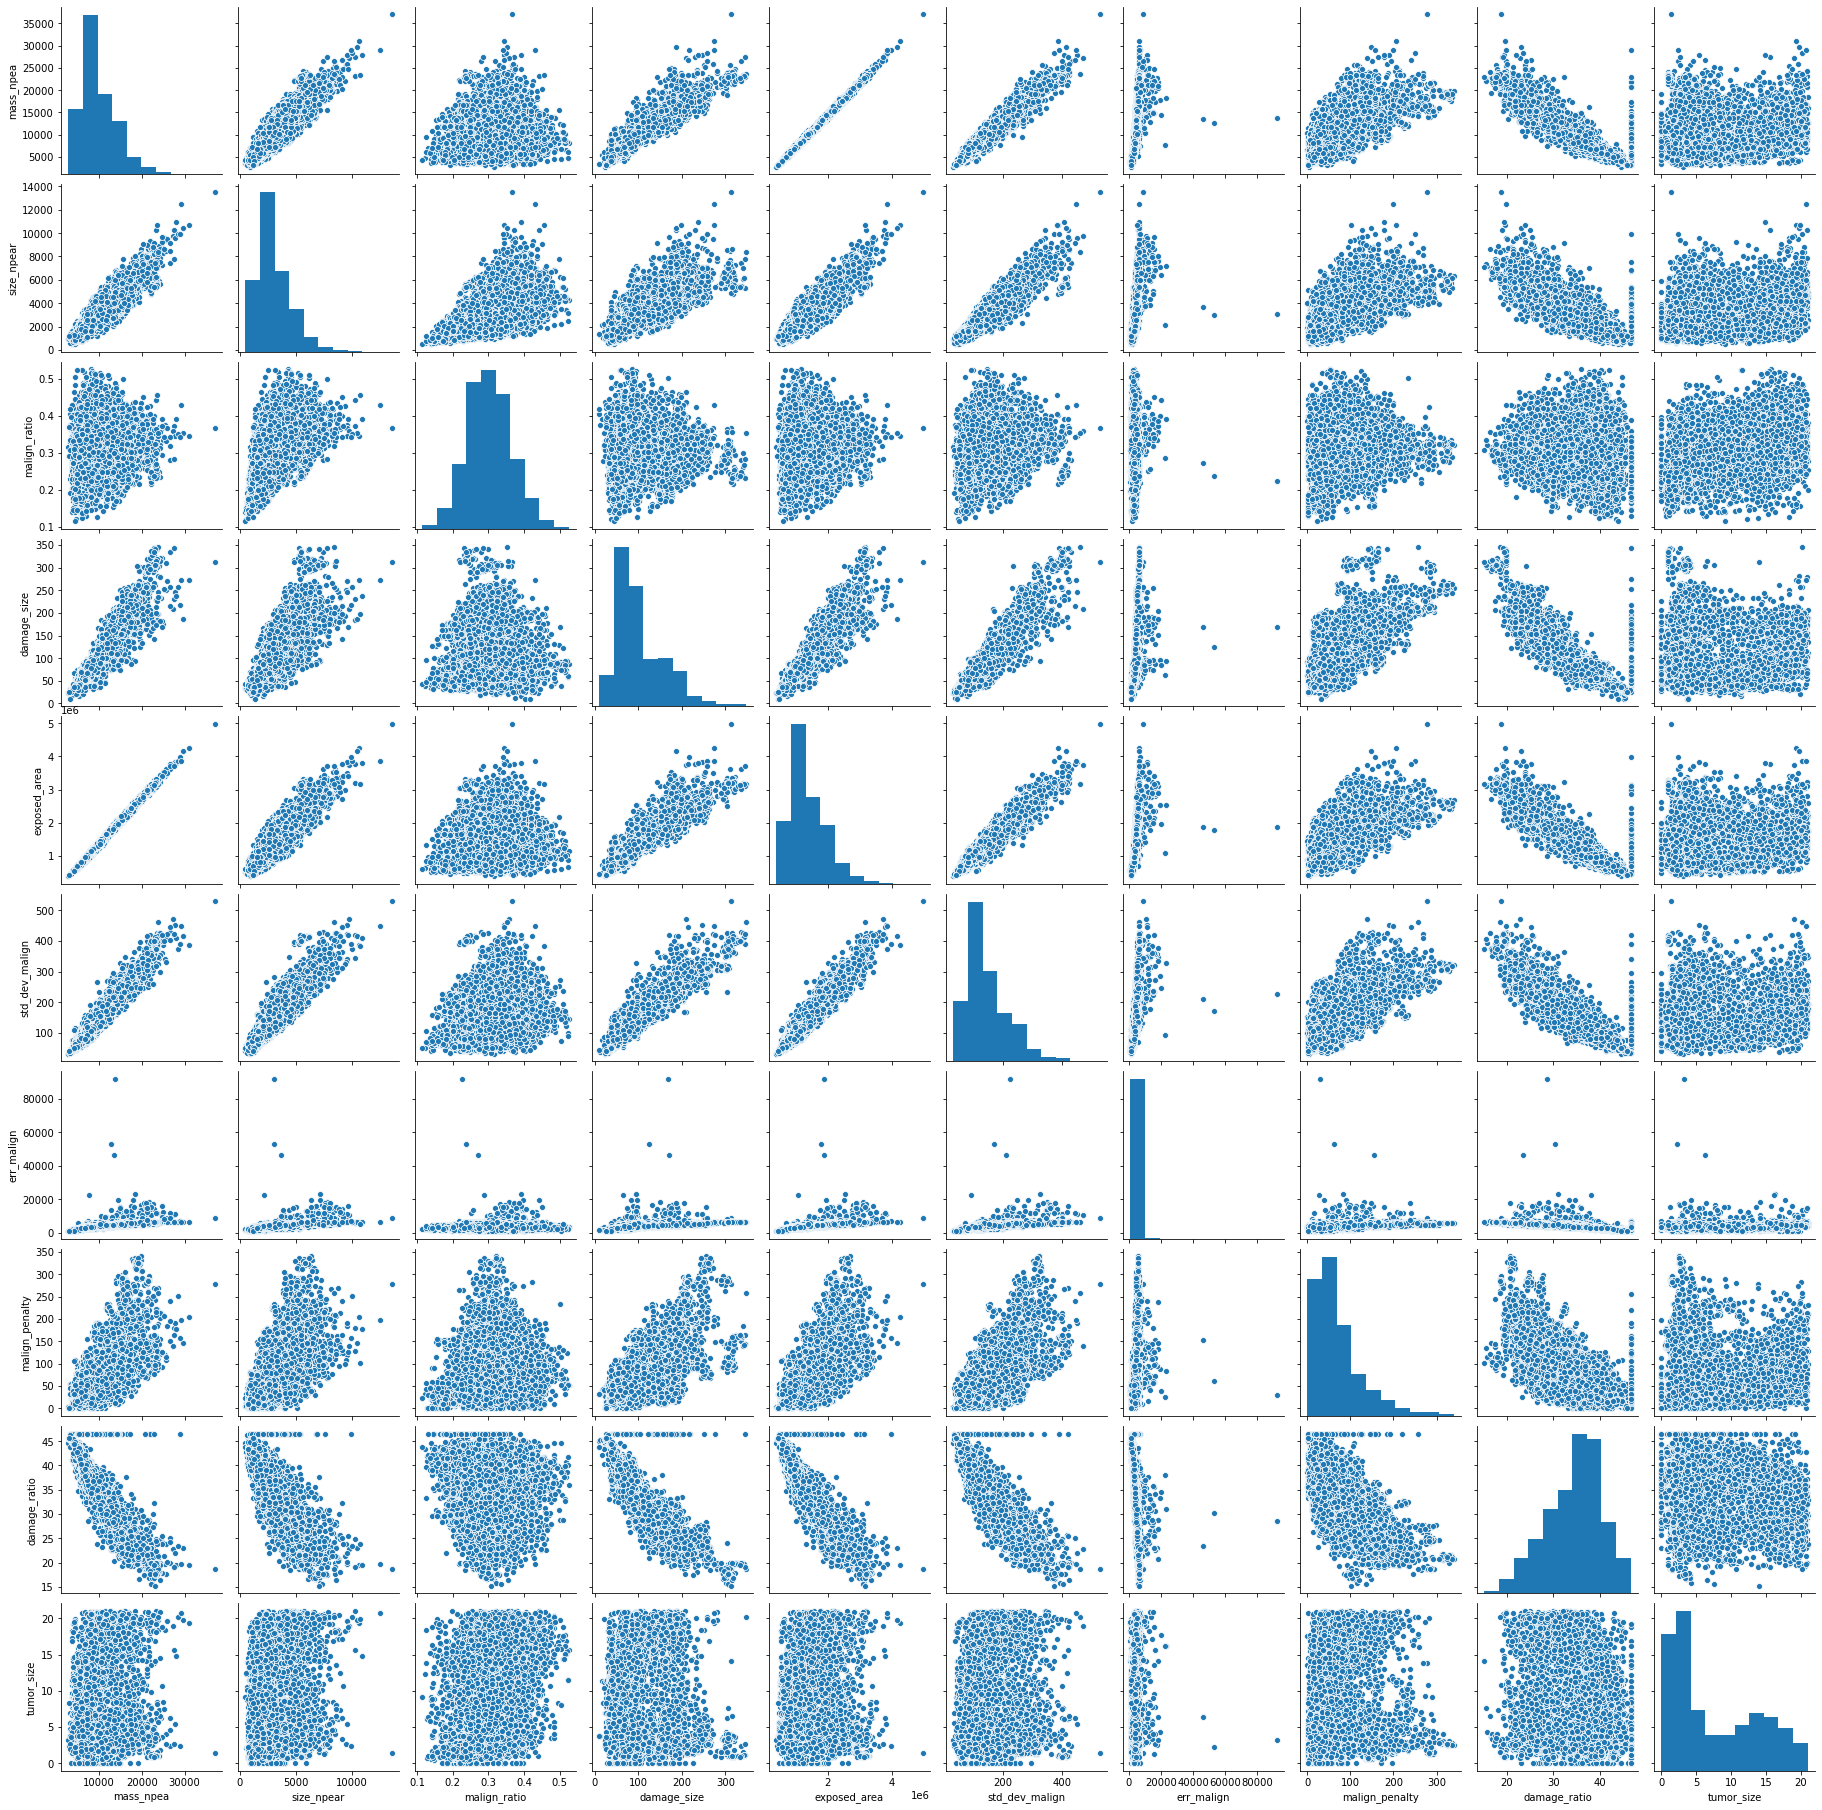

In [7]:
sns.pairplot(data=data)

From the above pair plot, it is evident that most variables contain skewed distribution. Data with skewness is not conducive for machine learning algorithm

### Feature Engineering

#### Log Transformation
Log Transformation is applied to data to reduce skewness in data and distribution will look like more normal

In [13]:
for column in data.columns:
    data[column] = np.log10(data[column]+0.1)

### Feature Selection

#### Variance Inflation Factor
 The relationship of one variable with respect to other variables can be measured using Variance Inflation Factor(VIF).
 Normally, a feature with VIF more than 10 can be eliminated

In [8]:
norm_data = data.copy()
for column in norm_data.columns:
    norm_data[column] = (norm_data[column]-norm_data[column].mean())/norm_data[column].std()
norm_data.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,-0.731953,-0.077826,1.888239,-0.938970,-0.679348,-0.522140,-0.693095,0.038547,0.820443,1.048104
1,1.411782,1.262729,0.143558,2.157495,1.214825,1.454738,1.100479,3.050091,-2.082162,-0.833821
2,0.116522,-0.286493,-0.818335,0.422579,0.110212,0.195551,0.360720,0.056473,-0.747614,-0.991538
3,0.785787,1.010188,0.661365,0.929333,0.778769,0.378811,0.719354,-0.678488,-1.059176,-0.645218
4,-0.580667,-0.102896,1.262169,-0.338613,-0.581792,-0.310446,-0.409725,-0.230341,0.093482,1.692115


In [9]:
for i in range(norm_data.shape[1]):
    a = variance_inflation_factor(norm_data.values,i)
    print(round(a,3),'------->',norm_data.columns[i])

422.229 -------> mass_npea
47.295 -------> size_npear
7.836 -------> malign_ratio
15.448 -------> damage_size
304.441 -------> exposed_area
25.647 -------> std_dev_malign
1.695 -------> err_malign
1.959 -------> malign_penalty
6.295 -------> damage_ratio
1.407 -------> tumor_size


The features 'mass_npea',  'size_npear',  'damage_size',  'exposed_area',  'std_dev_malign' have VIF more than 10. Hence they are eliminated

In [108]:
new_data = data.drop(['mass_npea','size_npear','damage_size','exposed_area','std_dev_malign'],axis=1)

In [110]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   malign_ratio    9146 non-null   float64
 1   err_malign      9146 non-null   float64
 2   malign_penalty  9146 non-null   float64
 3   damage_ratio    9146 non-null   float64
 4   tumor_size      9146 non-null   float64
dtypes: float64(5)
memory usage: 357.4 KB


In [111]:
x = new_data.drop(['tumor_size'],axis=1)
y = new_data.tumor_size

Train data divided into train and validation set

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### ML Algorithms

#### Linear Regression

In [113]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
RegErrorMetrics(y_test,y_pred)

RMSE--------> 0.38414214692028226
MAE---------> 0.3150921682649403
r-squared---> 0.15168801148317557


#### Ridge Regression

In [127]:
for i in [0.01,0.1,10,100,1000,10000]:
    ridge = Ridge(alpha=i)
    ridge.fit(x_train,y_train)
    y_pred = ridge.predict(x_test)
    RegErrorMetrics(y_test,y_pred)

RMSE--------> 0.38414146076665306
MAE---------> 0.31510036508196265
r-squared---> 0.15169104198547478
RMSE--------> 0.3841357208202977
MAE---------> 0.3151738480212503
r-squared---> 0.15171639312316898
RMSE--------> 0.3858243970040648
MAE---------> 0.3224063735809458
r-squared---> 0.1442418217247553
RMSE--------> 0.40162850233794056
MAE---------> 0.34404409617056303
r-squared---> 0.07269897976655337
RMSE--------> 0.4138654515698627
MAE---------> 0.35677610189962156
r-squared---> 0.015331523949036141
RMSE--------> 0.41673760027458545
MAE---------> 0.3588806740740621
r-squared---> 0.0016172717978045759


#### Lasso Regression

In [130]:
for i in [0.01,0.1,10,100,1000,10000]:
    lasso = Lasso(alpha=i)
    lasso.fit(x_train,y_train)
    y_pred = lasso.predict(x_test)
    RegErrorMetrics(y_test,y_pred)

RMSE--------> 0.41456150551555176
MAE---------> 0.35737544620853473
r-squared---> 0.01201663634082839
RMSE--------> 0.4172561998975595
MAE---------> 0.35918245693512024
r-squared---> -0.0008691036287316045
RMSE--------> 0.4172561998975595
MAE---------> 0.35918245693512024
r-squared---> -0.0008691036287316045
RMSE--------> 0.4172561998975595
MAE---------> 0.35918245693512024
r-squared---> -0.0008691036287316045
RMSE--------> 0.4172561998975595
MAE---------> 0.35918245693512024
r-squared---> -0.0008691036287316045
RMSE--------> 0.4172561998975595
MAE---------> 0.35918245693512024
r-squared---> -0.0008691036287316045


In [114]:
new_data.corr()

,malign_ratio,err_malign,malign_penalty,damage_ratio,tumor_size
malign_ratio,1.000000,0.103902,0.171787,-0.081037,0.367605
err_malign,0.103902,1.000000,0.520434,-0.802485,-0.029157
malign_penalty,0.171787,0.520434,1.000000,-0.588171,0.095180
damage_ratio,-0.081037,-0.802485,-0.588171,1.000000,0.082603
tumor_size,0.367605,-0.029157,0.095180,0.082603,1.000000


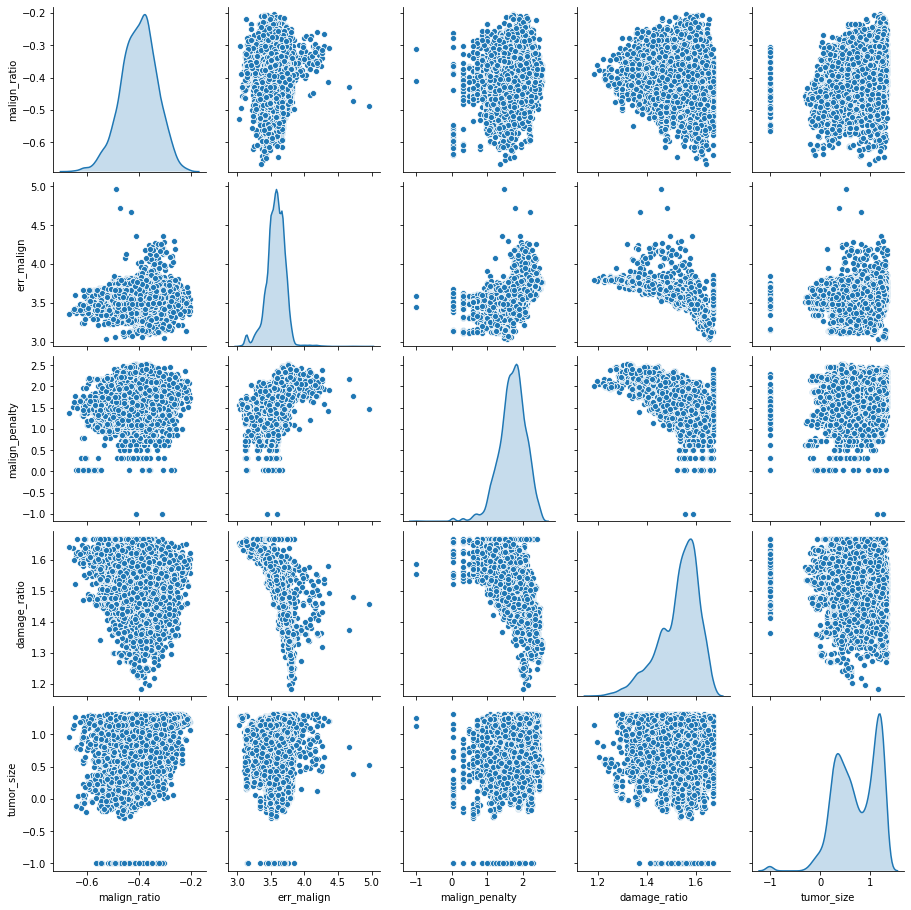

In [83]:
sns.pairplot(data=new_data,diag_kind='kde')

### Test Data - Applying Same preprocessing steps

In [115]:
test = pd.read_csv("D:\Data_Science\Machine_Hack\Melanoma_Tumour_Size_prediction\Test.csv")

In [116]:
test = test.drop(['mass_npea','size_npear','damage_size','exposed_area','std_dev_malign'],axis=1)

In [117]:
for column in test.columns:
    test[column] = np.log10(test[column]+0.1)

In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36584 entries, 0 to 36583
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   malign_ratio    36584 non-null  float64
 1   err_malign      36584 non-null  float64
 2   malign_penalty  36584 non-null  float64
 3   damage_ratio    36584 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


### Training model on complete training set and prediction on test set

In [119]:
lr_final = LinearRegression()
lr_final.fit(x,y)
y_pred_test = lr_final.predict(test)

In [128]:
ridge = Ridge(alpha=0.1)
ridge.fit(x,y)
y_pred_test = ridge.predict(test)

In [131]:
lasso = Lasso(alpha=0.01)
lasso.fit(x,y)
y_pred_test = lasso.predict(test)

### Submission

In [120]:
sub = pd.read_csv("D:\Data_Science\Machine_Hack\Melanoma_Tumour_Size_prediction\sample_submission.csv")
sub.head()

,tumor_size
0,3.418762
1,7.348026
2,3.096391
3,10.489805
4,27.416072


In [132]:
sub.tumor_size = y_pred_test
sub.to_csv("D:\Data_Science\Machine_Hack\Melanoma_Tumour_Size_prediction\submission_12_dec_20_Lasso.csv")